# Core Hub Evolution Analysis

This notebook analyzes how the key transportation hubs in Beijing subway network have evolved over time.
We focus on betweenness centrality, which measures how important a station is as a transfer point.

In [1]:
import sys
import os

# Add parent directory to path
current_dir = os.path.dirname(os.path.abspath('__file__'))
parent_dir = os.path.dirname(current_dir)
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

from src.subway_model import SubwayGraph

# Load the data
data_path = os.path.join(parent_dir, 'data', 'beijing_subway_data.csv')
subway = SubwayGraph(data_path)
print("Data loaded successfully")

Data loaded successfully


In [2]:
# Select two time periods to compare
# Using 2008 (Olympic year) and 2023 (current)
year1 = 2008
year2 = 2023

# Build graphs for both years
graph_2008 = subway.build_graph_for_date(str(year1))
graph_2023 = subway.build_graph_for_date(str(year2))

print(f"Network in {year1}: {graph_2008.number_of_nodes()} stations")
print(f"Network in {year2}: {graph_2023.number_of_nodes()} stations")

Network in 2008: 77 stations
Network in 2023: 367 stations


In [3]:
# Calculate betweenness centrality for both years
centrality_2008 = nx.betweenness_centrality(graph_2008)
centrality_2023 = nx.betweenness_centrality(graph_2023)

# Get top 5 stations for each year
top5_2008 = sorted(centrality_2008.items(), key=lambda x: x[1], reverse=True)[:5]
top5_2023 = sorted(centrality_2023.items(), key=lambda x: x[1], reverse=True)[:5]

print(f"\nTop 5 hubs in {year1}:")
for i, (station, score) in enumerate(top5_2008, 1):
    print(f"  {i}. {station}: {score:.4f}")

print(f"\nTop 5 hubs in {year2}:")
for i, (station, score) in enumerate(top5_2023, 1):
    print(f"  {i}. {station}: {score:.4f}")


Top 5 hubs in 2008:
  1. Sanyuanqiao: 0.0670
  2. Dongzhimen: 0.0593
  3. Liangmaqiao: 0.0589
  4. Agricultural Exhibition Center: 0.0579
  5. Tuanjiehu: 0.0561

Top 5 hubs in 2023:
  1. Ping'anli: 0.2154
  2. Cishousi: 0.2141
  3. Caoqiao: 0.1903
  4. Huoying: 0.1872
  5. Lishuiqiao: 0.1871


Figure saved to ../figures/hub_evolution.png


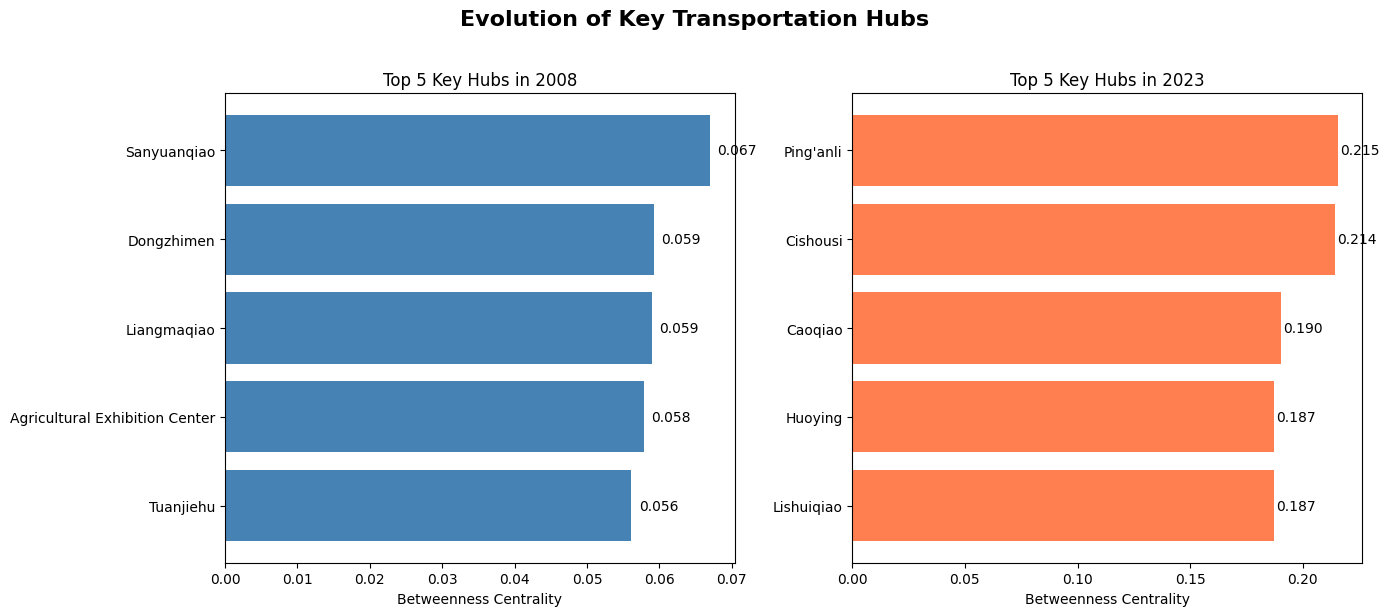

In [4]:
# Create comparison bar chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot for 2008
stations_2008 = [s[0] for s in top5_2008]
scores_2008 = [s[1] for s in top5_2008]

ax1.barh(range(len(stations_2008)), scores_2008, color='steelblue')
ax1.set_yticks(range(len(stations_2008)))
ax1.set_yticklabels(stations_2008)
ax1.set_xlabel('Betweenness Centrality')
ax1.set_title(f'Top 5 Key Hubs in {year1}')
ax1.invert_yaxis()

# Add values on bars
for i, v in enumerate(scores_2008):
    ax1.text(v + 0.001, i, f'{v:.3f}', va='center')

# Plot for 2023
stations_2023 = [s[0] for s in top5_2023]
scores_2023 = [s[1] for s in top5_2023]

ax2.barh(range(len(stations_2023)), scores_2023, color='coral')
ax2.set_yticks(range(len(stations_2023)))
ax2.set_yticklabels(stations_2023)
ax2.set_xlabel('Betweenness Centrality')
ax2.set_title(f'Top 5 Key Hubs in {year2}')
ax2.invert_yaxis()

for i, v in enumerate(scores_2023):
    ax2.text(v + 0.001, i, f'{v:.3f}', va='center')

plt.suptitle('Evolution of Key Transportation Hubs', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()

# Save the figure
plt.savefig('../figures/hub_evolution.png', dpi=300, bbox_inches='tight')
print("Figure saved to ../figures/hub_evolution.png")
plt.show()

In [5]:
# Analysis: which stations remained important?
stations_2008_set = set([s[0] for s in top5_2008])
stations_2023_set = set([s[0] for s in top5_2023])

# Find common stations
common = stations_2008_set & stations_2023_set
new_hubs = stations_2023_set - stations_2008_set
old_hubs = stations_2008_set - stations_2023_set

print("\nHub Evolution Analysis:")
print(f"Stations that remained key hubs: {common if common else 'None'}")
print(f"New emerging hubs: {new_hubs if new_hubs else 'None'}")
print(f"Stations no longer in top 5: {old_hubs if old_hubs else 'None'}")

print("\nKey observations:")
print(f"- The network expanded from {graph_2008.number_of_nodes()} to {graph_2023.number_of_nodes()} stations")
print(f"- Hub structure has {'significantly changed' if len(common) <= 2 else 'evolved gradually'}")
print(f"- Average centrality in 2008: {np.mean(scores_2008):.4f}")
print(f"- Average centrality in 2023: {np.mean(scores_2023):.4f}")


Hub Evolution Analysis:
Stations that remained key hubs: None
New emerging hubs: {'Cishousi', 'Huoying', 'Caoqiao', "Ping'anli", 'Lishuiqiao'}
Stations no longer in top 5: {'Sanyuanqiao', 'Tuanjiehu', 'Liangmaqiao', 'Dongzhimen', 'Agricultural Exhibition Center'}

Key observations:
- The network expanded from 77 to 367 stations
- Hub structure has significantly changed
- Average centrality in 2008: 0.0599
- Average centrality in 2023: 0.1988
